### Läser in data från en Excelfil, som innehåller flera blad

I det här steget hämtas data från Excelfilen.     
Varje blad sparas som en egen Data Frame i en dictionary. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as op
import numpy as np

In [3]:
#Läser in filen för att veta vilka sheets som filen innehåller, och som ska läsas in till programmet. 
sheets = pd.ExcelFile("data/riket2023_åk9_np.xlsx").sheet_names
print(sheets)  

['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk', 'Rapportbeskrivning och def.']


In [4]:
#Läser in excelfilen och sparar respektive sheet med hjälp av en for-loop. 
#Hämtar data från och med rad 8 för att enbart få med nödvändig data.
#Väljer bort bladet "Rapportbeskrivning... då det inte innehåller någon data som är relevant för uppgiften"

file = "data/riket2023_åk9_np.xlsx"
sheets = ['Engelska', 'Matematik', 'Svenska', 'Svenska som andraspråk']

In [5]:
#Sparar respektive data frame i en dictionary (data_frames)
data_frames = {sheet: pd.read_excel(file, sheet_name= sheet, header = 8) for sheet in sheets} #Här har jag tagit hjälp av chatGPT, då jag ville läsa in samtliga sheets genom en loop och hade svårt att hitta information om hur jag kunde lösa det. 

Byter namn på tabellerna via en for-loop, för att inte upprepa samma kod flera gånger. 

In [6]:
#Ändrar namn på kolumnerna i enlighet med uppgiften.
#Använder en for-loop som itererar respektive dataframe i min dictionary med dataframes för att byta namn på kolumnerna samtidigt. 
for sheet, df in data_frames.items():
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", 
    "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", 
    "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]

In [7]:
#Kontrollutskrift för att se att kolumnerna har bytt namn
data_frames["Engelska"].head()


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [8]:
#Utskrift av dataframe "Svenska som andra språk, eftersom jag sedan tidigare vet att tabellen har icke-numeriska värden. "
data_frames["Svenska som andraspråk"]



,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092.0,6447.0,7645.0,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963.0,5495.0,6468.0,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122.0,949.0,1173.0,87.7,90.9,85.2,11.1,12.0,10.4


#### Bearbetning av datan i dataframe "Svenska som andra språk". 
I den här delen ersätts icke-numeriska värden till NaN.    
Rader med Nan droppas.    
Konverterar även datatyper från object till float.    


In [9]:
#Loopar igenom samtliga sheets för att ersätta ickenumeriska värden med NaN
for sheet, df in data_frames.items():
    df.replace("..", np.nan, inplace= True) 

data_frames["Svenska som andraspråk"]

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092.0,6447.0,7645.0,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963.0,5495.0,6468.0,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122.0,949.0,1173.0,87.7,90.9,85.2,11.1,12.0,10.4


In [62]:
#Tar bort alla null-värden från tabellerna.
df.dropna(inplace=True)

#Utskrift av "Svenska som andra språk" för att säkerställa att raden Skolverket är tom. 
data_frames["Svenska som andraspråk"]


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092.0,6447.0,7645.0,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963.0,5495.0,6468.0,75.9,80.0,72.4,9.0,9.9,8.3
2,Riket,Enskild,2122.0,949.0,1173.0,87.7,90.9,85.2,11.1,12.0,10.4


In [63]:
#Konverterar datatyperna i "Svenska som andraspråk" från object till int
if sheet == "Svenska som andraspråk":
    numeric_cols = ["Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")  

#### Visualisering av datan

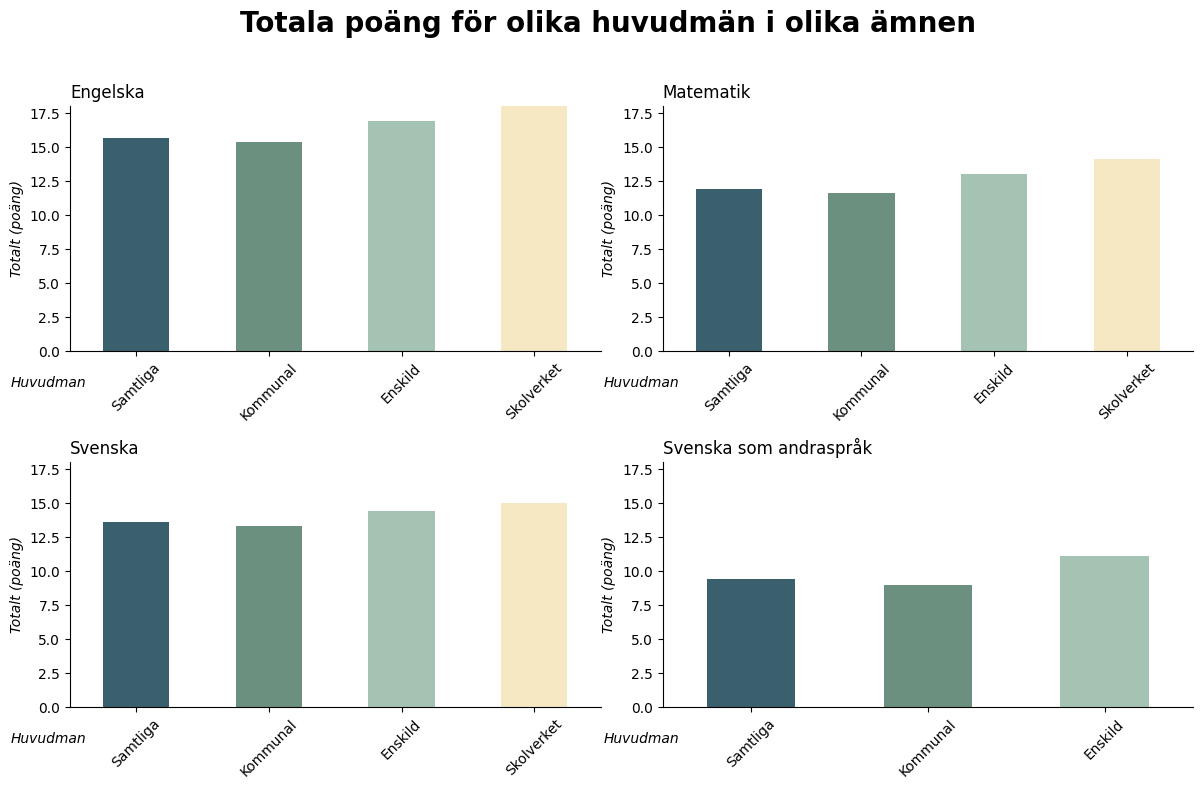

In [66]:
#Skapar en subplot för att kunna skapa diagram för respektive ämne i en och samma plott. 
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
fig.suptitle("Totala poäng för olika huvudmän i olika ämnen", fontsize=20, fontweight = "bold")

# Plottar varje ämne i en subplot
for ax, (subject, df) in zip(axes.flatten(), data_frames.items()):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    df.plot(kind="bar", x="Huvudman", y="Totalt (poäng)", ax=ax, legend=False, color=["#3A606E", "#6B9080", "#A4C3B2", "#F6E8C3"] 

 )
    ax.set_title(subject, loc="left")  # Använd 'subject' som titel
    ax.set_ylabel("Totalt (poäng)", fontsize=10, fontstyle = "italic")
    ax.set_xlabel("Huvudman", fontsize=10, fontstyle = "italic")
    ax.xaxis.set_label_coords(-0.04, -0.10) #Tog hjälp av chatGPT för att kunna vänsterjustera labeln. 
    ax.set_ylim(0, 18) #Tog hjälp av chatGPT för att sätta samma värden på y-axeln, då det blir enklare att jämföra datan i respektive diagram. 
    ax.tick_params(axis="x", rotation=45)  # Rotera texten så den syns tydligt

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Justerar layouten för att undvika överlapp
plt.show()  # Visa plotten



In [ ]:
#Sparar figuren som png.
plt.savefig('Totala_poäng_per_huvuman.png')

<Figure size 640x480 with 0 Axes>